# Anomaly detection using account and transaction datasets
* No prior label was provided, need to generate our own label for normal--0 and anomaly--1
* Columns:
* For each account the following information is provided:
* ACCTTYPE, ACCTNAME, FIRSTNAME, SURNAME, DOB, ACCTCREATED, ACCTRISK, ADDRESS, ADDRESS_LAT, ADDRESS_LON, CATEGORY
* For each transaction the following information is provided:
* TXN_ID, TXTYPE, AMOUNT, FROMACCTID, TOACCTID, TXDATE, REFERENCE, ISFRAUD, ISFLAGGED

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

# 1. import the datasets and join them

In [103]:
account = pd.read_csv('anomaly-detection_anomaly-detection/faccount.txt')
account.set_index('ACCTID',inplace=True)
account.head()

,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
ACCTID,,,,,,,,,,,
800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery


In [104]:
account_FROMACCT = account.copy()
account_FROMACCT.columns = ['FROMACCT_' + str(col) for col in account_FROMACCT.columns]
account_FROMACCT.head()

,FROMACCT_ACCTTYPE,FROMACCT_ACCTNAME,FROMACCT_FIRSTNAME,FROMACCT_SURNAME,FROMACCT_DOB,FROMACCT_ACCTCREATED,FROMACCT_ACCTRISK,FROMACCT_ADDRESS,FROMACCT_ADDRESS_LAT,FROMACCT_ADDRESS_LON,FROMACCT_CATEGORY
ACCTID,,,,,,,,,,,
800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery


In [105]:
account_TOACCT = account.copy()
account_TOACCT.columns = ['TOACCT_' + str(col) for col in account_TOACCT.columns]
account_TOACCT.head()

,TOACCT_ACCTTYPE,TOACCT_ACCTNAME,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY
ACCTID,,,,,,,,,,,
800039,BUSINESS,Young Supermarket,Kevin,Young,1982-02-23T00:00:00,2018-09-20T00:00:00,MEDIUM,BRISBANE,-27.512179,153.073105,Supermarket
800040,BUSINESS,Williams Grocery,Lindsay,Williams,1959-02-20T00:00:00,2018-02-24T00:00:00,MEDIUM,BRISBANE,-27.504303,153.073470,Grocery
800041,CREDIT,Myers Supermarket,Lisa,Myers,1982-09-04T00:00:00,2018-01-11T00:00:00,HIGH,BRISBANE,-27.484970,153.097588,Supermarket
800042,BUSINESS,Martinez Supermarket,Brittany,Martinez,1976-10-11T00:00:00,2018-12-04T00:00:00,MEDIUM,BRISBANE,-27.402357,153.056983,Supermarket
800043,CREDIT,Taylor Grocery,David,Taylor,1978-01-23T00:00:00,2019-07-15T00:00:00,MEDIUM,BRISBANE,-27.473628,152.955089,Grocery


In [296]:
transaction_only = pd.read_csv('anomaly-detection_anomaly-detection/ftxn2.txt')
transaction_only.head()

,TXN_ID,TXTYPE,AMOUNT,FROMACCTID,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
0,950060711303,PAYMENT,320,500607,800242,2020-01-22T17:00:00,Dinner with Shane,N,Y
1,950060711401,PAYMENT,48,500607,800111,2020-01-23T08:00:00,Breakfast with Steven,N,Y
2,950060711402,TRANSFER,6209,500607,500929,2020-01-23T13:00:00,Holiday Cost,N,Y
3,950060711403,PAYMENT,66,500607,800252,2020-01-23T17:00:00,Meal with Mary,N,Y
4,950060711501,PAYMENT,47,500607,800116,2020-01-24T08:00:00,Coffee with Brian,N,Y


In [106]:
transaction = pd.read_csv('anomaly-detection_anomaly-detection/ftxn2.txt')
transaction.set_index('FROMACCTID',inplace=True)
transaction.head()

,TXN_ID,TXTYPE,AMOUNT,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED
FROMACCTID,,,,,,,,
500607,950060711303,PAYMENT,320,800242,2020-01-22T17:00:00,Dinner with Shane,N,Y
500607,950060711401,PAYMENT,48,800111,2020-01-23T08:00:00,Breakfast with Steven,N,Y
500607,950060711402,TRANSFER,6209,500929,2020-01-23T13:00:00,Holiday Cost,N,Y
500607,950060711403,PAYMENT,66,800252,2020-01-23T17:00:00,Meal with Mary,N,Y
500607,950060711501,PAYMENT,47,800116,2020-01-24T08:00:00,Coffee with Brian,N,Y


In [107]:
transaction = transaction.join(account_FROMACCT, how='left')
transaction.head()

,TXN_ID,TXTYPE,AMOUNT,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,FROMACCT_ACCTNAME,FROMACCT_FIRSTNAME,FROMACCT_SURNAME,FROMACCT_DOB,FROMACCT_ACCTCREATED,FROMACCT_ACCTRISK,FROMACCT_ADDRESS,FROMACCT_ADDRESS_LAT,FROMACCT_ADDRESS_LON,FROMACCT_CATEGORY
500000,950000007202,TRANSFER,7479,500417,2019-12-12T13:00:00,Subscription Costs,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,950000007203,PAYMENT,465,800242,2019-12-12T17:00:00,Meal with Jose,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,950000007301,PAYMENT,69,800195,2019-12-13T08:00:00,Breakfast with Whitney,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,950000007302,TRANSFER,9763,500042,2019-12-13T13:00:00,Settling Deal,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,950000007303,PAYMENT,443,800271,2019-12-13T17:00:00,Dinner with Samuel,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER


In [108]:
transaction.reset_index(inplace=True)
transaction.rename(columns={'index':'FROMACCTID'},inplace=True)
transaction.head()

,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TOACCTID,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,FROMACCT_ACCTNAME,FROMACCT_FIRSTNAME,FROMACCT_SURNAME,FROMACCT_DOB,FROMACCT_ACCTCREATED,FROMACCT_ACCTRISK,FROMACCT_ADDRESS,FROMACCT_ADDRESS_LAT,FROMACCT_ADDRESS_LON,FROMACCT_CATEGORY
0,500000,950000007202,TRANSFER,7479,500417,2019-12-12T13:00:00,Subscription Costs,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
1,500000,950000007203,PAYMENT,465,800242,2019-12-12T17:00:00,Meal with Jose,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
2,500000,950000007301,PAYMENT,69,800195,2019-12-13T08:00:00,Breakfast with Whitney,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
3,500000,950000007302,TRANSFER,9763,500042,2019-12-13T13:00:00,Settling Deal,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
4,500000,950000007303,PAYMENT,443,800271,2019-12-13T17:00:00,Dinner with Samuel,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER


In [109]:
transaction.set_index('TOACCTID',inplace=True)
transaction.head()

,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,FROMACCT_ACCTNAME,FROMACCT_FIRSTNAME,FROMACCT_SURNAME,FROMACCT_DOB,FROMACCT_ACCTCREATED,FROMACCT_ACCTRISK,FROMACCT_ADDRESS,FROMACCT_ADDRESS_LAT,FROMACCT_ADDRESS_LON,FROMACCT_CATEGORY
TOACCTID,,,,,,,,,,,,,,,,,,,
500417,500000,950000007202,TRANSFER,7479,2019-12-12T13:00:00,Subscription Costs,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
800242,500000,950000007203,PAYMENT,465,2019-12-12T17:00:00,Meal with Jose,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
800195,500000,950000007301,PAYMENT,69,2019-12-13T08:00:00,Breakfast with Whitney,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500042,500000,950000007302,TRANSFER,9763,2019-12-13T13:00:00,Settling Deal,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
800271,500000,950000007303,PAYMENT,443,2019-12-13T17:00:00,Dinner with Samuel,N,Y,MAXI-SAVER,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER


In [110]:
transaction = transaction.join(account_TOACCT, how='left')
transaction.head()

,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,FROMACCT_ACCTNAME,...,TOACCT_ACCTNAME,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY
500000,500000,950000030602,TRANSFER,1482,2020-08-02T13:00:00,Gift Costs,N,Y,MAXI-SAVER,"Gutierrez, Jenna",...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,500000,950000035202,TRANSFER,3452,2020-09-17T13:00:00,Payment for Job,N,Y,MAXI-SAVER,"Gutierrez, Jenna",...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,500003,950000327102,TRANSFER,4972,2020-06-28T13:00:00,Settling Deal,N,Y,SAVINGS,"Burgess, Shelley",...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,500006,950000631002,TRANSFER,1230,2020-08-06T13:00:00,Gift Costs,N,Y,CREDIT,"Dennis, Thomas",...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
500000,500007,950000722102,TRANSFER,3354,2020-05-09T13:00:00,Gift Costs,N,Y,CREDIT,"Wagner, Nicole",...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER


In [111]:
transaction.reset_index(inplace=True)
transaction.rename(columns={'index':'TOACCTID'},inplace=True)
transaction.head()

,TOACCTID,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,...,TOACCT_ACCTNAME,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY
0,500000,500000,950000030602,TRANSFER,1482,2020-08-02T13:00:00,Gift Costs,N,Y,MAXI-SAVER,...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
1,500000,500000,950000035202,TRANSFER,3452,2020-09-17T13:00:00,Payment for Job,N,Y,MAXI-SAVER,...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
2,500000,500003,950000327102,TRANSFER,4972,2020-06-28T13:00:00,Settling Deal,N,Y,SAVINGS,...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
3,500000,500006,950000631002,TRANSFER,1230,2020-08-06T13:00:00,Gift Costs,N,Y,CREDIT,...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER
4,500000,500007,950000722102,TRANSFER,3354,2020-05-09T13:00:00,Gift Costs,N,Y,CREDIT,...,"Gutierrez, Jenna",Jenna,Gutierrez,1963-10-18T00:00:00,2015-03-28T00:00:00,LOW,BRISBANE,-27.501761,153.038465,CUSTOMER


In [112]:
transaction.shape

(1533066, 31)

# 2. data cleaning
* missing values
* convert data types

In [113]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533066 entries, 0 to 1533065
Data columns (total 31 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   TOACCTID              1533066 non-null  int64  
 1   FROMACCTID            1533066 non-null  int64  
 2   TXN_ID                1533066 non-null  int64  
 3   TXTYPE                1533066 non-null  object 
 4   AMOUNT                1533066 non-null  int64  
 5   TXDATE                1533066 non-null  object 
 6   REFERENCE             1533066 non-null  object 
 7   ISFRAUD               1533066 non-null  object 
 8   ISFLAGGED             1533066 non-null  object 
 9   FROMACCT_ACCTTYPE     1533066 non-null  object 
 10  FROMACCT_ACCTNAME     1533066 non-null  object 
 11  FROMACCT_FIRSTNAME    1533066 non-null  object 
 12  FROMACCT_SURNAME      1533066 non-null  object 
 13  FROMACCT_DOB          1533066 non-null  object 
 14  FROMACCT_ACCTCREATED  1533066 non-

In [114]:
# convert date columns into date objects
transaction['TXDATE'] = pd.to_datetime(transaction['TXDATE'])
transaction['FROMACCT_ACCTCREATED'] = pd.to_datetime(transaction['FROMACCT_ACCTCREATED'])
transaction['TOACCT_ACCTCREATED'] = pd.to_datetime(transaction['TOACCT_ACCTCREATED'])

# convert IDs to categorical datatype
transaction['TOACCTID'] = transaction['TOACCTID'].astype('category')
transaction['FROMACCTID'] = transaction['FROMACCTID'].astype('category')
transaction['TXN_ID'] = transaction['TXN_ID'].astype('category')

# log transform AMOUNT
transaction['AMOUNT_log'] = transaction['AMOUNT'].apply(lambda x: np.log(x+1))

In [115]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533066 entries, 0 to 1533065
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   TOACCTID              1533066 non-null  category      
 1   FROMACCTID            1533066 non-null  category      
 2   TXN_ID                1533066 non-null  category      
 3   TXTYPE                1533066 non-null  object        
 4   AMOUNT                1533066 non-null  int64         
 5   TXDATE                1533066 non-null  datetime64[ns]
 6   REFERENCE             1533066 non-null  object        
 7   ISFRAUD               1533066 non-null  object        
 8   ISFLAGGED             1533066 non-null  object        
 9   FROMACCT_ACCTTYPE     1533066 non-null  object        
 10  FROMACCT_ACCTNAME     1533066 non-null  object        
 11  FROMACCT_FIRSTNAME    1533066 non-null  object        
 12  FROMACCT_SURNAME      1533066 non-null  ob

In [116]:
# check missing values
transaction.isnull().sum()

TOACCTID                0
FROMACCTID              0
TXN_ID                  0
TXTYPE                  0
AMOUNT                  0
TXDATE                  0
REFERENCE               0
ISFRAUD                 0
ISFLAGGED               0
FROMACCT_ACCTTYPE       0
FROMACCT_ACCTNAME       0
FROMACCT_FIRSTNAME      0
FROMACCT_SURNAME        0
FROMACCT_DOB            0
FROMACCT_ACCTCREATED    0
FROMACCT_ACCTRISK       0
FROMACCT_ADDRESS        0
FROMACCT_ADDRESS_LAT    0
FROMACCT_ADDRESS_LON    0
FROMACCT_CATEGORY       0
TOACCT_ACCTTYPE         0
TOACCT_ACCTNAME         0
TOACCT_FIRSTNAME        0
TOACCT_SURNAME          0
TOACCT_DOB              0
TOACCT_ACCTCREATED      0
TOACCT_ACCTRISK         0
TOACCT_ADDRESS          0
TOACCT_ADDRESS_LAT      0
TOACCT_ADDRESS_LON      0
TOACCT_CATEGORY         0
AMOUNT_log              0
dtype: int64

In [117]:
# Number of unique values of each categorical column
transaction.describe(include='all').loc['unique', :]

TOACCTID                       1615
FROMACCTID                     1415
TXN_ID                  1.53307e+06
TXTYPE                            2
AMOUNT                          NaN
TXDATE                         1098
REFERENCE                      2768
ISFRAUD                           1
ISFLAGGED                         1
FROMACCT_ACCTTYPE                 4
FROMACCT_ACCTNAME              1402
FROMACCT_FIRSTNAME              416
FROMACCT_SURNAME                582
FROMACCT_DOB                   1337
FROMACCT_ACCTCREATED           1021
FROMACCT_ACCTRISK                 3
FROMACCT_ADDRESS                  1
FROMACCT_ADDRESS_LAT            NaN
FROMACCT_ADDRESS_LON            NaN
FROMACCT_CATEGORY                 8
TOACCT_ACCTTYPE                   4
TOACCT_ACCTNAME                1593
TOACCT_FIRSTNAME                444
TOACCT_SURNAME                  620
TOACCT_DOB                     1518
TOACCT_ACCTCREATED             1113
TOACCT_ACCTRISK                   3
TOACCT_ADDRESS              

In [118]:
transaction.describe()

,AMOUNT,FROMACCT_ADDRESS_LAT,FROMACCT_ADDRESS_LON,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,AMOUNT_log
count,1.533066e+06,1.533066e+06,1.533066e+06,1.533066e+06,1.533066e+06,1.533066e+06
mean,1.865467e+03,-2.746797e+01,1.530265e+02,-2.746409e+01,1.530294e+02,5.935193e+00
std,3.039119e+03,4.289236e-02,4.287274e-02,4.286064e-02,4.348739e-02,1.917801e+00
min,2.500000e+01,-2.754323e+01,1.529509e+02,-2.754323e+01,1.529509e+02,3.258097e+00
25%,6.600000e+01,-2.750494e+01,1.529892e+02,-2.749908e+01,1.529945e+02,4.204693e+00
50%,2.800000e+02,-2.746870e+01,1.530253e+02,-2.746171e+01,1.530305e+02,5.638355e+00
75%,2.873000e+03,-2.743072e+01,1.530624e+02,-2.742803e+01,1.530668e+02,7.963460e+00
max,2.000200e+05,-2.739301e+01,1.531074e+02,-2.739301e+01,1.531074e+02,1.220618e+01


# 3. Anomaly visualization
* We'll look at different metrics and try to detect outliers visually

## 3.1 Duplicated accounts

In [324]:
account[account.duplicated(subset=['ACCTNAME','ACCTTYPE'])==True]

,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
ACCTID,,,,,,,,,,,
800065,BUSINESS,Beck Supermarket,Russell,Beck,1976-12-07T00:00:00,2018-12-15T00:00:00,MEDIUM,BRISBANE,-27.532767,153.050960,Supermarket
800095,CREDIT,Anderson Grocery,Jeffrey,Anderson,1962-05-10T00:00:00,2017-06-22T00:00:00,LOW,BRISBANE,-27.510751,153.083788,Grocery
800139,BUSINESS,Clark Bakery,Shawn,Clark,1974-05-01T00:00:00,2016-03-17T00:00:00,MEDIUM,BRISBANE,-27.506147,153.046149,Bakery
800006,BUSINESS,Campbell Supermarket,Jessica,Campbell,1978-03-12T00:00:00,2015-07-21T00:00:00,LOW,BRISBANE,-27.430221,152.966480,Supermarket
800246,BUSINESS,Johnson Restaurant,Sonya,Johnson,1975-03-17T00:00:00,2015-05-17T00:00:00,LOW,BRISBANE,-27.476648,153.064339,Restaurant
800266,CREDIT,Martinez Restaurant,Sandra,Martinez,1970-12-27T00:00:00,2018-01-27T00:00:00,LOW,BRISBANE,-27.489436,153.076806,Restaurant
800273,CREDIT,Wood Restaurant,Eric,Wood,1972-05-29T00:00:00,2018-11-13T00:00:00,LOW,BRISBANE,-27.463916,152.995979,Restaurant
800322,BUSINESS,Kelley Finance,Matthew,Kelley,1991-03-31T00:00:00,2019-12-07T00:00:00,LOW,BRISBANE,-27.419443,153.089865,Finance
800398,BUSINESS,Williams Events,Jacob,Williams,1974-08-23T00:00:00,2015-08-06T00:00:00,MEDIUM,BRISBANE,-27.431348,153.087528,Events


In [325]:
account[account.ACCTNAME=='Beck Supermarket']

,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
ACCTID,,,,,,,,,,,
800053,BUSINESS,Beck Supermarket,Jorge,Beck,1991-07-03T00:00:00,2015-10-27T00:00:00,MEDIUM,BRISBANE,-27.473299,152.97439,Supermarket
800065,BUSINESS,Beck Supermarket,Russell,Beck,1976-12-07T00:00:00,2018-12-15T00:00:00,MEDIUM,BRISBANE,-27.532767,153.05096,Supermarket


In [327]:
account[account.ACCTNAME=='Anderson Grocery']

,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
ACCTID,,,,,,,,,,,
800045,CREDIT,Anderson Grocery,Raymond,Anderson,1980-03-21T00:00:00,2018-02-12T00:00:00,LOW,BRISBANE,-27.402610,153.003706,Grocery
800095,CREDIT,Anderson Grocery,Jeffrey,Anderson,1962-05-10T00:00:00,2017-06-22T00:00:00,LOW,BRISBANE,-27.510751,153.083788,Grocery


In [328]:
account[account.ACCTNAME=='Clark Bakery']

,ACCTTYPE,ACCTNAME,FIRSTNAME,SURNAME,DOB,ACCTCREATED,ACCTRISK,ADDRESS,ADDRESS_LAT,ADDRESS_LON,CATEGORY
ACCTID,,,,,,,,,,,
800106,BUSINESS,Clark Bakery,Ralph,Clark,1988-07-09T00:00:00,2016-06-27T00:00:00,MEDIUM,BRISBANE,-27.513950,152.972443,Bakery
800139,BUSINESS,Clark Bakery,Shawn,Clark,1974-05-01T00:00:00,2016-03-17T00:00:00,MEDIUM,BRISBANE,-27.506147,153.046149,Bakery


## 3.2 Account risk level

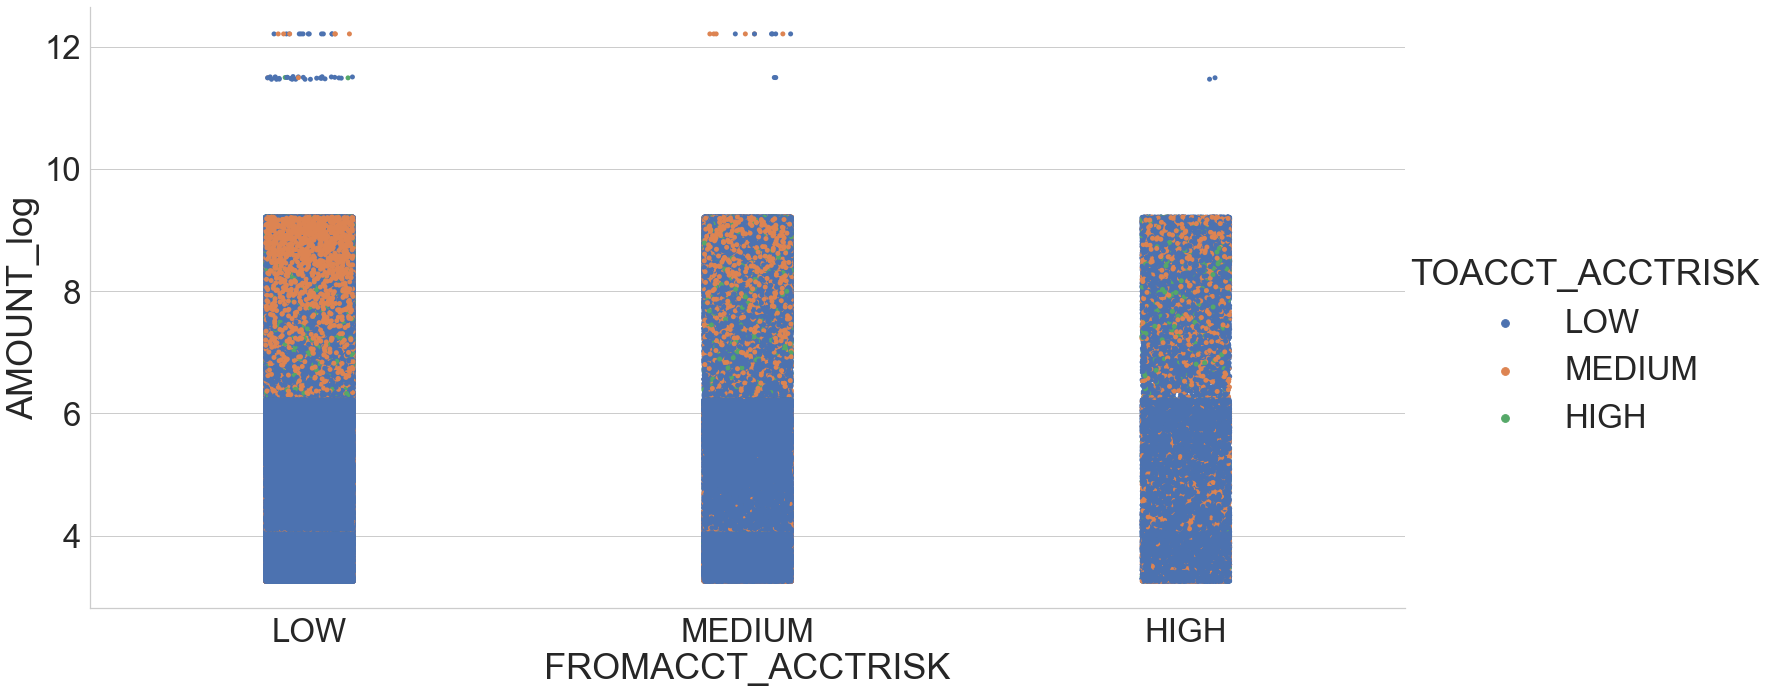

In [181]:
# when AMOUNT_log > 10, FROMACCT_ACCTRISK == 'HIGH', transactions can be treated as anomaly
sns.set(font_scale=3)
sns.set_style('whitegrid')
sns.catplot(x='FROMACCT_ACCTRISK', y='AMOUNT_log', data=transaction, hue='TOACCT_ACCTRISK',
            height=10, aspect=2)

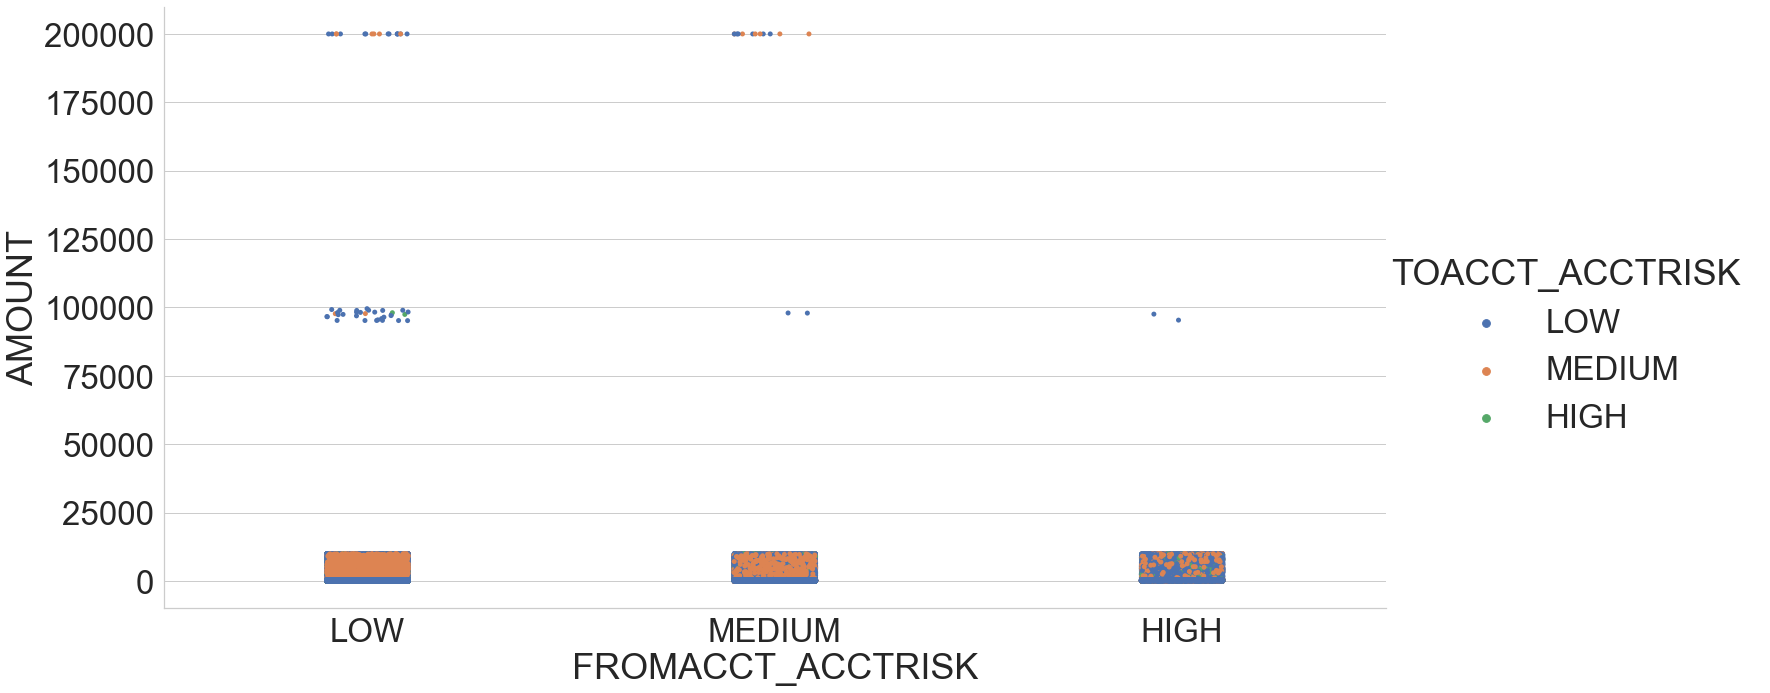

In [299]:
# when AMOUNT > 100,000, FROMACCT_ACCTRISK == 'MEDIUM', or 'HIGH', transactions can be treated as anomaly
sns.set(font_scale=3)
sns.set_style('whitegrid')
sns.catplot(x='FROMACCT_ACCTRISK', y='AMOUNT', data=transaction, hue='TOACCT_ACCTRISK',
            height=10, aspect=2)
plt.savefig('img/risk_amount.png')

## 3.3 Account categories

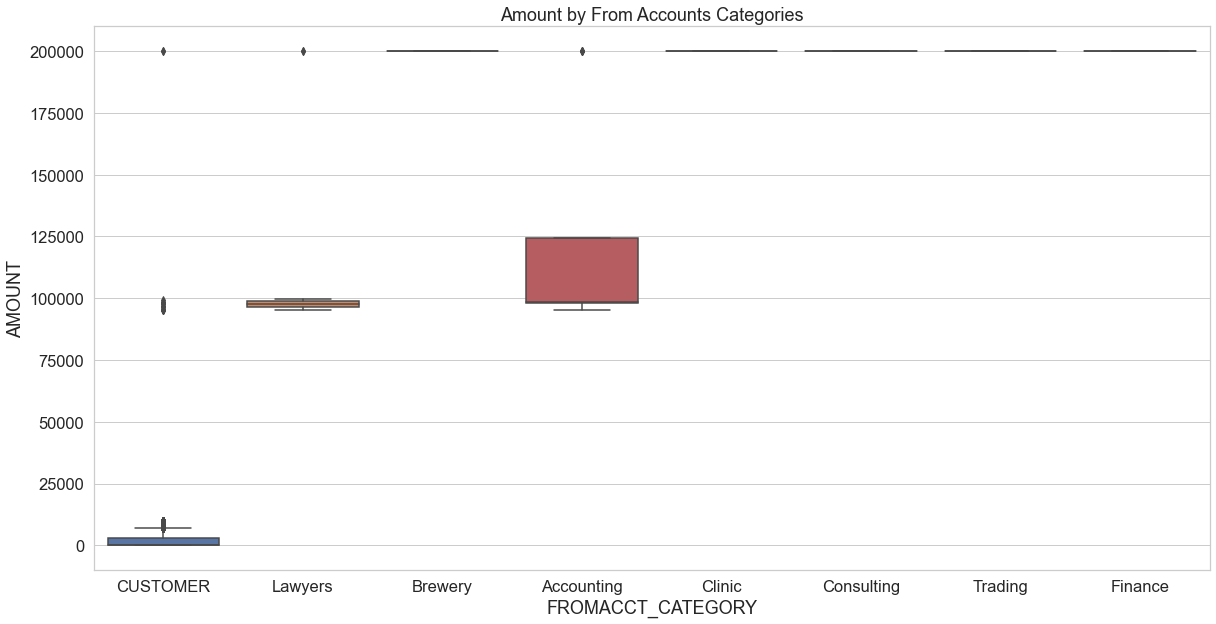

In [329]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x='FROMACCT_CATEGORY', y='AMOUNT', data=transaction)
plt.title('Amount by From Accounts Categories')
plt.savefig('img/boxplot_FROMACCT_CATEGORY.png')

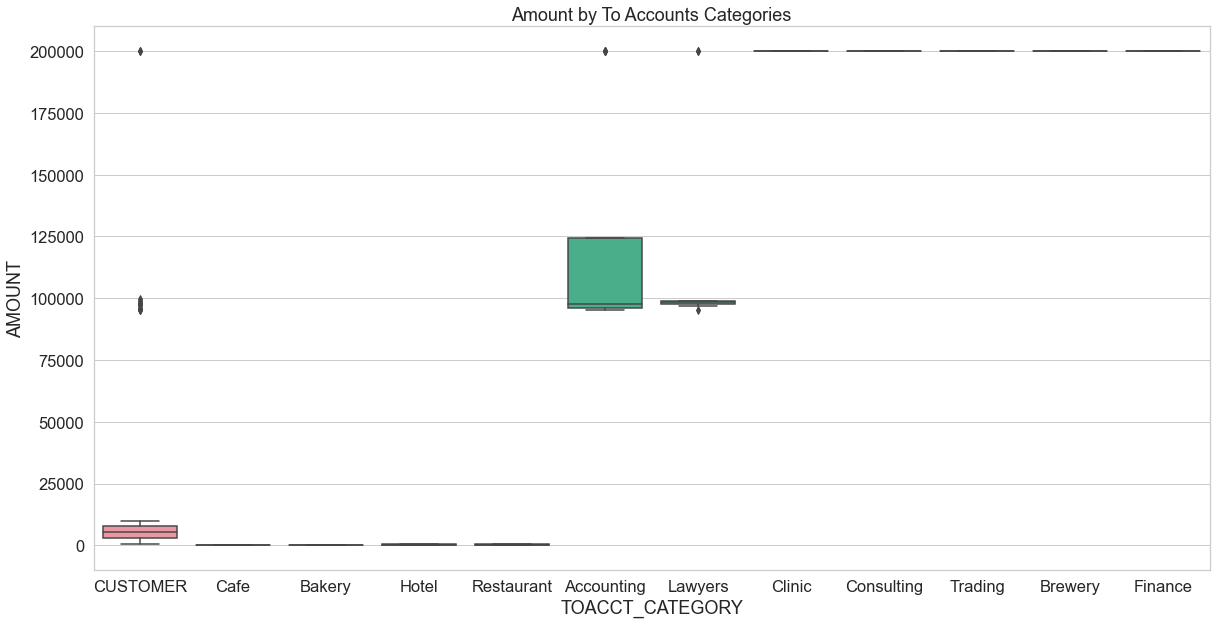

In [330]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x='TOACCT_CATEGORY', y='AMOUNT', data=transaction)
plt.title('Amount by To Accounts Categories')
plt.savefig('img/boxplot_TOACCT_CATEGORY.png')

## 3.4 Rare events

In [301]:
transaction[transaction.FROMACCT_CATEGORY=='Clinic']

,TOACCTID,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,...,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY,AMOUNT_log
1533044,800381,800379,9150080015002,TRANSFER,200012,2020-02-28 10:00:00,Instalment,N,Y,CREDIT,...,Yvonne,Campbell,1969-10-31T00:00:00,2017-02-28,LOW,BRISBANE,-27.527667,153.063866,Consulting,12.206138
1533045,800381,800379,9150080115002,TRANSFER,200005,2020-02-28 10:00:00,Payment for Job,N,Y,CREDIT,...,Yvonne,Campbell,1969-10-31T00:00:00,2017-02-28,LOW,BRISBANE,-27.527667,153.063866,Consulting,12.206103
1533054,800403,800392,9150080015007,TRANSFER,200014,2020-02-28 10:00:00,Settling Deal,N,Y,BUSINESS,...,Sarah,Brown,1970-09-04T00:00:00,2016-05-08,MEDIUM,BRISBANE,-27.418806,153.057073,Brewery,12.206148
1533055,800403,800392,9150080115007,TRANSFER,200011,2020-02-28 10:00:00,Paid for FixUp,N,Y,BUSINESS,...,Sarah,Brown,1970-09-04T00:00:00,2016-05-08,MEDIUM,BRISBANE,-27.418806,153.057073,Brewery,12.206133


In [300]:
transaction[transaction.TOACCT_CATEGORY=='Clinic']

,TOACCTID,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,...,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY,AMOUNT_log
1533042,800379,800378,9150080015001,TRANSFER,200006,2020-02-28 10:00:00,Settling Deal,N,Y,BUSINESS,...,Patricia,Sandoval,1989-11-28T00:00:00,2015-05-16,LOW,BRISBANE,-27.438879,153.012347,Clinic,12.206108
1533043,800379,800378,9150080115001,TRANSFER,200012,2020-02-28 10:00:00,Settling Deal,N,Y,BUSINESS,...,Patricia,Sandoval,1989-11-28T00:00:00,2015-05-16,LOW,BRISBANE,-27.438879,153.012347,Clinic,12.206138
1533052,800392,800390,9150080015006,TRANSFER,200011,2020-02-28 10:00:00,Water Costs,N,Y,CREDIT,...,Antonio,Waters,1969-01-22T00:00:00,2020-02-16,MEDIUM,BRISBANE,-27.522384,152.970811,Clinic,12.206133
1533053,800392,800390,9150080115006,TRANSFER,200001,2020-02-28 10:00:00,Subscription Costs,N,Y,CREDIT,...,Antonio,Waters,1969-01-22T00:00:00,2020-02-16,MEDIUM,BRISBANE,-27.522384,152.970811,Clinic,12.206083


In [303]:
transaction[transaction.FROMACCT_CATEGORY=='Brewery']

,TOACCTID,FROMACCTID,TXN_ID,TXTYPE,AMOUNT,TXDATE,REFERENCE,ISFRAUD,ISFLAGGED,FROMACCT_ACCTTYPE,...,TOACCT_FIRSTNAME,TOACCT_SURNAME,TOACCT_DOB,TOACCT_ACCTCREATED,TOACCT_ACCTRISK,TOACCT_ADDRESS,TOACCT_ADDRESS_LAT,TOACCT_ADDRESS_LON,TOACCT_CATEGORY,AMOUNT_log
292527,500800,800435,9150080015050,TRANSFER,200012,2020-02-28 11:00:00,Holiday Cost,N,Y,BUSINESS,...,James,Padilla,1958-04-20T00:00:00,2018-07-10,LOW,BRISBANE,-27.478357,153.058970,CUSTOMER,12.206138
292920,500801,800435,9150080115050,TRANSFER,200018,2020-02-28 11:00:00,Holiday Cost,N,Y,BUSINESS,...,Lisa,Parker,1962-01-23T00:00:00,2018-09-06,LOW,BRISBANE,-27.450913,153.062382,CUSTOMER,12.206168
1533050,800390,800388,9150080015005,TRANSFER,200008,2020-02-28 10:00:00,Payment for Job,N,Y,CREDIT,...,Alexandria,Carpenter,1974-03-30T00:00:00,2017-06-18,MEDIUM,BRISBANE,-27.441682,153.091432,Accounting,12.206118
1533051,800390,800388,9150080115005,TRANSFER,200015,2020-02-28 10:00:00,Holiday Cost,N,Y,CREDIT,...,Alexandria,Carpenter,1974-03-30T00:00:00,2017-06-18,MEDIUM,BRISBANE,-27.441682,153.091432,Accounting,12.206153
1533056,800404,800403,9150080015008,TRANSFER,200003,2020-02-28 10:00:00,Gift Costs,N,Y,CREDIT,...,William,Hicks,1973-08-01T00:00:00,2018-12-19,LOW,BRISBANE,-27.426541,153.086784,Consulting,12.206093
1533057,800404,800403,9150080115008,TRANSFER,200015,2020-02-28 10:00:00,Water Costs,N,Y,CREDIT,...,William,Hicks,1973-08-01T00:00:00,2018-12-19,LOW,BRISBANE,-27.426541,153.086784,Consulting,12.206153


## 3.5 Abnormal days

In [309]:
day_mean = transaction[['TXDATE','AMOUNT']].groupby('TXDATE').mean().sort_values('AMOUNT', ascending=False)
day_mean.columns = ['Day_transaction_mean']
day_mean.head(10)

,Day_transaction_mean
TXDATE,
2020-02-28 11:00:00,200015.000000
2020-02-28 10:00:00,200010.038462
2020-02-28 09:00:00,200001.500000
2020-04-20 13:00:00,6119.366147
2019-11-14 13:00:00,5454.037857
2020-08-26 13:00:00,5450.311429
2020-03-22 13:00:00,5441.371429
2020-09-05 13:00:00,5435.175000
2019-11-29 13:00:00,5431.127857


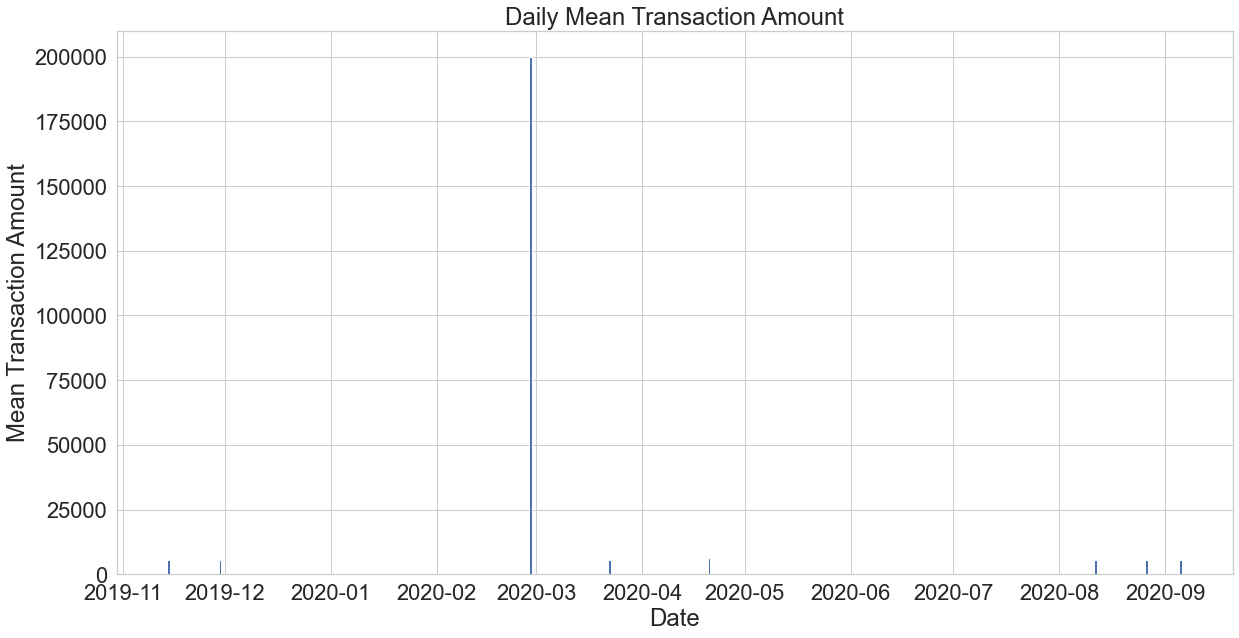

In [323]:
sns.set(font_scale=2)
sns.set_style('whitegrid')
plt.bar(x=day_mean.index[:10], height=day_mean.Day_transaction_mean[:10])
plt.xlabel('Date')
plt.ylabel('Mean Transaction Amount')
plt.title('Daily Mean Transaction Amount')
plt.savefig('img/day_mean_transaction.png')

## 3.6 Most frequently references

In [332]:
reference_count = transaction[['REFERENCE', 'AMOUNT']].groupby(by='REFERENCE').count().sort_values(by='AMOUNT',ascending=False)
reference_count.columns = ['COUNT']
reference_count.head(10)

,COUNT
REFERENCE,
Holiday Cost,64142
Subscription Costs,64097
Paid for FixUp,64054
Water Costs,63974
Payment for Job,63858
Gift Costs,63767
Instalment,63674
Settling Deal,63500
Meal with Michael,5865


In [335]:
reference_mean = transaction[['REFERENCE', 'AMOUNT']].groupby(by='REFERENCE').mean().sort_values(by='AMOUNT',ascending=False)
reference_mean.columns = ['Average']
reference_mean.head(10)

,Average
REFERENCE,
Holiday Cost,5278.731128
Settling Deal,5273.315622
Instalment,5267.460518
Payment for Job,5262.965674
Gift Costs,5262.817288
Water Costs,5259.159080
Subscription Costs,5257.045197
Paid for FixUp,5246.291332
Dinner with Lydia,329.120000


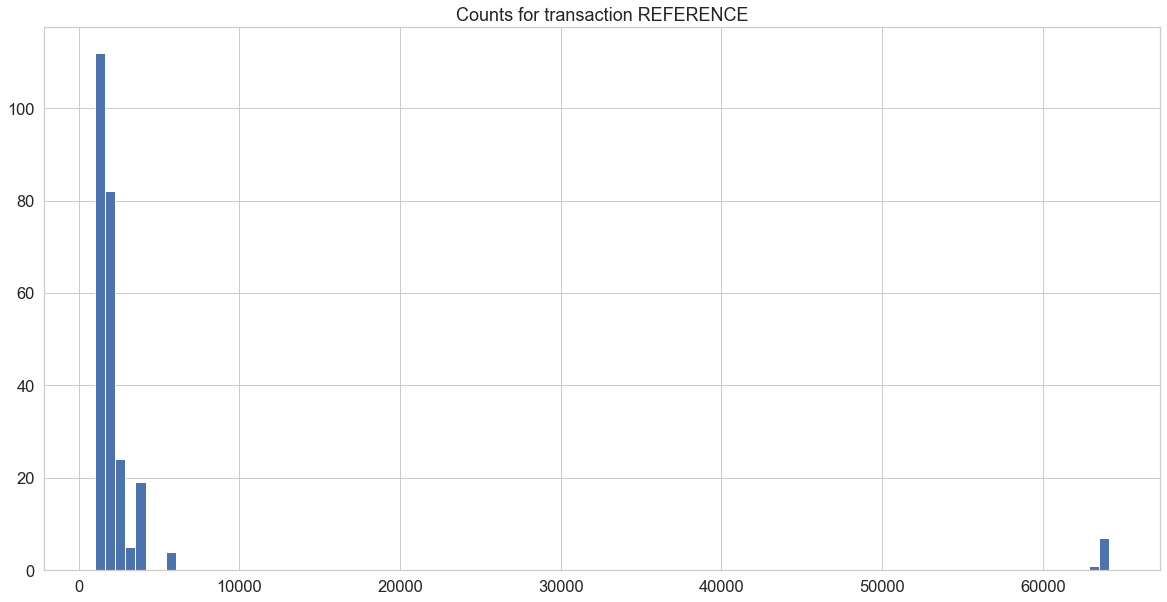

In [331]:
#reference count > 60000 is anomaly
reference_count[reference_count.COUNT>1000].hist(bins=100)
plt.title('Counts for transaction REFERENCE')
plt.savefig('img/counts_reference.png')

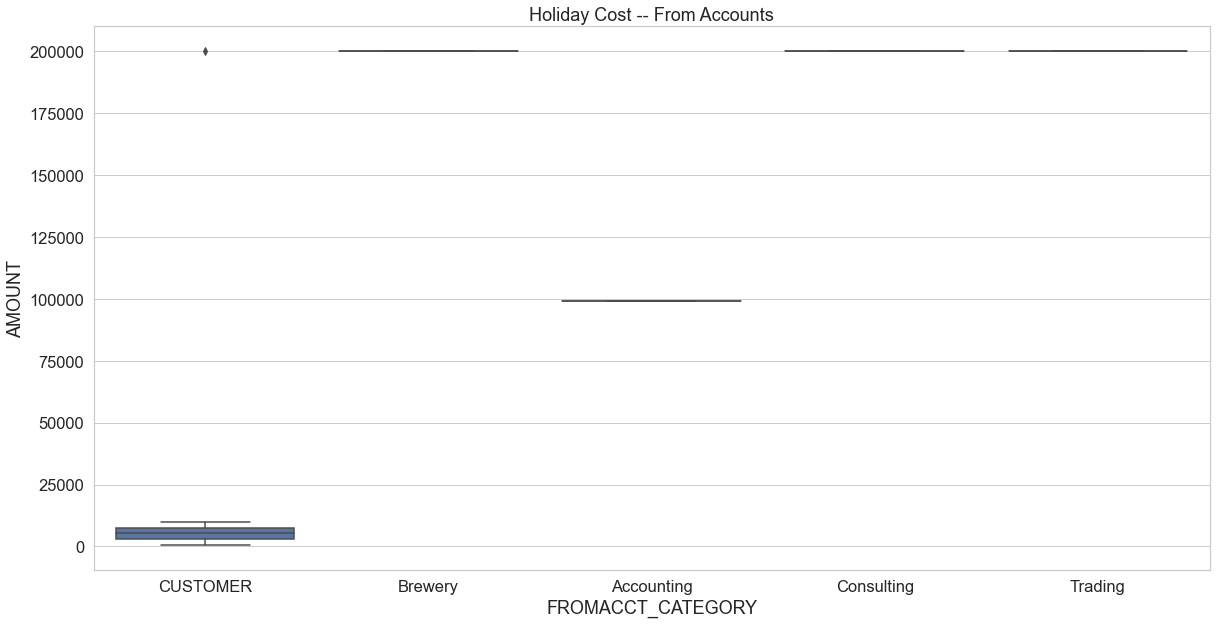

In [333]:
# A closer look at Holiday Cost
holiday_cost = transaction[transaction.REFERENCE=='Holiday Cost']
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x='FROMACCT_CATEGORY', y='AMOUNT', data=holiday_cost)
plt.title('Holiday Cost -- From Accounts')
plt.savefig('img/boxplot_holiday_cost_FROMACCT_CATEGORY.png')

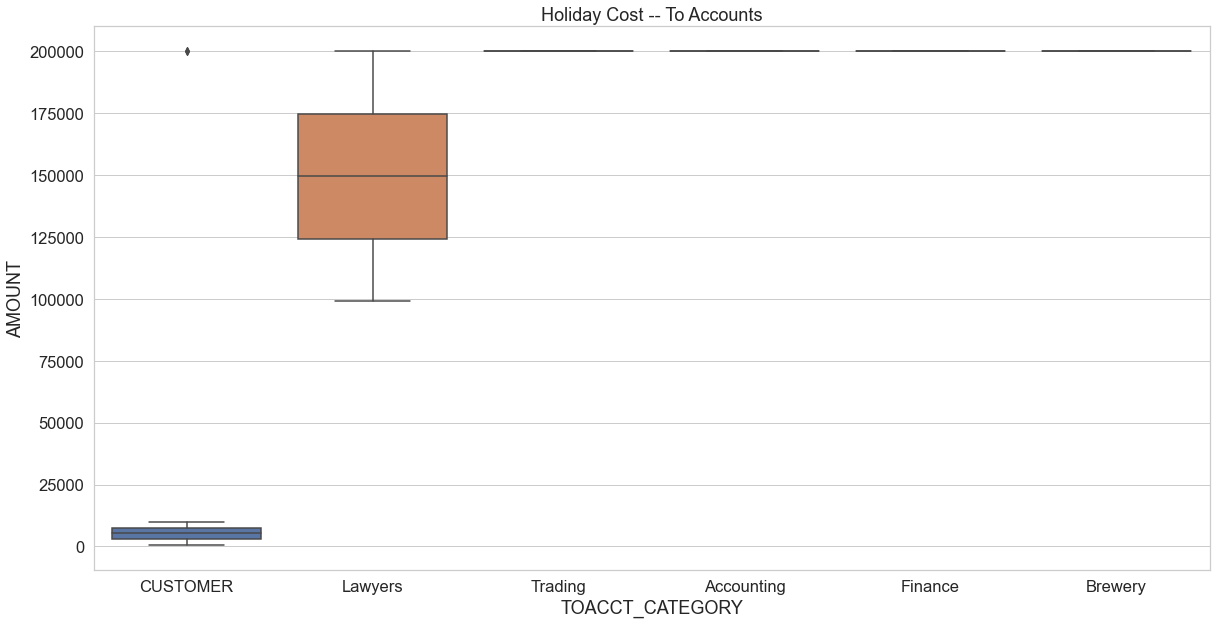

In [334]:
sns.boxplot(x='TOACCT_CATEGORY', y='AMOUNT', data=holiday_cost)
plt.title('Holiday Cost -- To Accounts')
plt.savefig('img/boxplot_holiday_cost_TOACCT_CATEGORY.png')

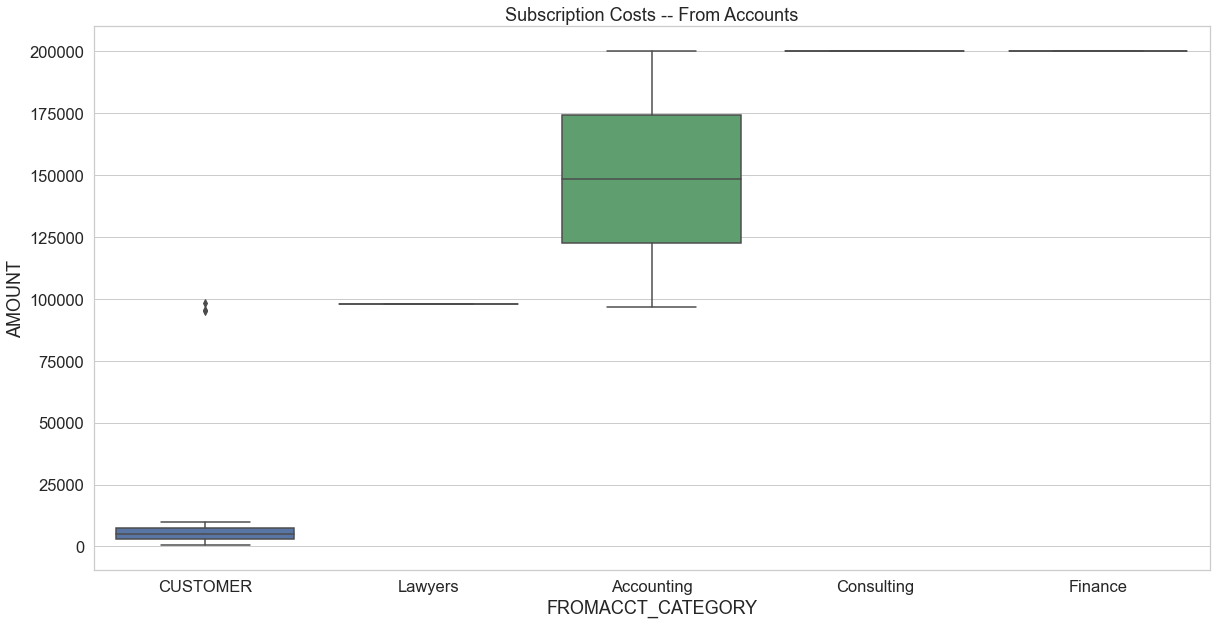

In [281]:
# a closer look at Subscription Costs
subscription_costs = transaction[transaction.REFERENCE=='Subscription Costs']
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x='FROMACCT_CATEGORY', y='AMOUNT', data=subscription_costs)
plt.title('Subscription Costs -- From Accounts')
plt.savefig('img/boxplot_subscription_costs_FROMACCT_CATEGORY.png')

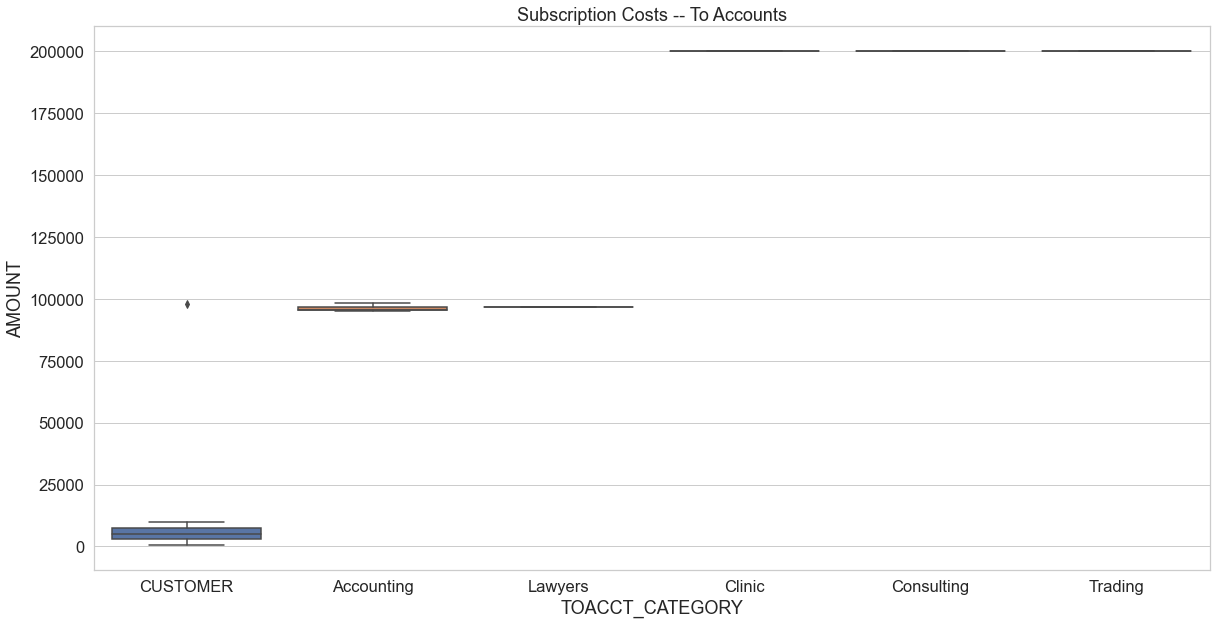

In [282]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.boxplot(x='TOACCT_CATEGORY', y='AMOUNT', data=subscription_costs)
plt.title('Subscription Costs -- To Accounts')
plt.savefig('img/boxplot_subscription_costs_TOACCT_CATEGORY.png')

## 3.7 Individual Account
* A group of accounts are involved in large and infrequent transactions

In [341]:
FROMACCTID_mean = transaction[['FROMACCTID','AMOUNT']].groupby(['FROMACCTID']).mean().sort_values(by='AMOUNT',ascending=False)
FROMACCTID_mean.columns =['Transaction_mean']
FROMACCTID_mean.head(20)

,Transaction_mean
FROMACCTID,
800412,200018.000000
800435,200015.000000
800427,200014.500000
800392,200012.500000
800388,200011.500000
800434,200011.000000
800381,200010.500000
800378,200009.000000
800403,200009.000000


In [342]:
TOACCTID_mean = transaction[['TOACCTID','AMOUNT']].groupby(['TOACCTID']).mean().sort_values(by='AMOUNT',ascending=False)
TOACCTID_mean.columns =['Transaction_mean']
TOACCTID_mean.head(20)

,Transaction_mean
TOACCTID,
800427,200018.000000
800434,200014.500000
800403,200012.500000
800390,200011.500000
800435,200011.000000
800382,200010.500000
800379,200009.000000
800378,200009.000000
800404,200009.000000


In [343]:
FROMACCTID_Count = transaction[['FROMACCTID','AMOUNT']].groupby(['FROMACCTID']).count().sort_values(by='AMOUNT',ascending=True)
FROMACCTID_Count.columns =['TotalCount']
FROMACCTID_Count.head(20)

,TotalCount
FROMACCTID,
800435,2
800434,2
800379,2
800381,2
800382,2
800388,2
800378,2
800392,2
800403,2
